#EDA & Booking Cancelation Prediction

Major Online Travel Agency (OTA) platforms make it much easier for people to travel. To attract more users to book, most OTA will set loose cancellation policies, such as free cancellation at any time or at a limited time. “Free cancellation” is a good policy for consumers because they can have more choices. However, for hotels, cancelling booking orders usually results in loss of hotel revenue. Therefore, in this project, we are trying to find the best model for predicting hotel bookings cancellation to reduce hotels losses under “free cancellation” policies. 

### Table of Contents


*   Data Input 

*   Data Preprocessing

*   Exploratory Data Analysis
 
*   Feature Engineering

*   Data Cleaning

*   Model Building to Predict Hotel Cancellation


### Data Input

In [1]:
# Setup

import warnings
warnings.filterwarnings('ignore')

# Common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline


In [2]:
# Load data
full_data = pd.read_csv('hotel_bookings.csv')
full_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

### Data Preprocessing

In [4]:
# Check variables
full_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# check for missing values
full_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 1. Check NA value

In [3]:
# Replacing the NA value
## Agent: if no agent is giving, the booking was made without agent, replace NA with 0
## Company: if no company is giving, the booking was made by private, replace NA with 0
## Country: replace NA with 'Unknown'
## Children: remove row with NA
## Remove row with no guests (0 adults, 0 children, and 0 babies)

clean = full_data.fillna({'agent':0, 'company':0, 'country':'Unknown'})

clean = clean.dropna(subset=['children'])

no_guests = list(clean.loc[clean['adults'] +
                           clean['children'] +
                           clean['babies'] == 0].index)

clean.drop(clean.index[no_guests], inplace = True)

clean.shape

(119206, 32)

In [4]:
# Get the descriptive statistics
clean.describe()

is_canceled      lead_time  arrival_date_year  \
count  119206.000000  119206.000000      119206.000000   
mean        0.370686     104.066498        2016.156485   
std         0.482991     106.887834           0.707465   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119206.000000              119206.000000   
mean                  27.163448                  15.799373   
std                   13.601549                   8.781425   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119206.000000         119206.000000  119206.000000   
mean                  0.927764              2.500956       1.856693   
std                   0.998791              1.908602       0.578975   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119206.000000  119206.000000      119206.000000   
mean        0.103938       0.007944           0.031878   
std         0.398691       0.097426           0.175675   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119206.000000                   119206.000000   
mean                 0.087185                        0.136981   
std                  0.844928                        1.497842   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent        company  days_in_waiting_list  \
count    119206.000000  119206.000000  119206.000000         119206.000000   
mean          0.220878      74.905038      10.758359              2.322685   
std           0.651664     107.186018      53.885033             17.601236   
min           0.000000       0.000000       0.000000              0.000000   
25%           0.000000       7.000000       0.000000              0.000000   
50%           0.000000       9.000000       0.000000              0.000000   
75%           0.000000     152.000000       0.000000              0.000000   
max          21.000000     535.000000     543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119206.000000                119206.000000              119206.000000  
mean      101.844854                     0.062572                   0.571246  
std        50.541746                     0.245393                   0.792770  
min        -6.380000                     0.000000                   0.000000  
25%        69.220000                     0.000000                   0.000000  
5

### 2. Check incorrect column

The maximum value in Column 'stays_in_weekend_nights' should be equal or less than 2. However, the maximun value in Column 'stays_in_weekend_nights is 19. Check the unique number in this column. 

In [5]:
clean['stays_in_weekend_nights'].value_counts()

0     51912
2     33261
1     30578
4      1855
3      1256
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [6]:
# Column 'stays_in_weekend_nights' is not correct. Remove this column
df = clean.drop(['stays_in_weekend_nights'], axis = 1)

In [7]:
# Change dtype of variable 'children','company','agent' to int
df['children'] = df['children'].astype(int)
df['company'] = df['company'].astype(int)
df['agent'] = df['agent'].astype(int)

Column 'reservation_status' is the same as column 'is_canceled', so we drop column 'reservation_status'

In [8]:
df = df.drop(['reservation_status'], axis = 1)

### 3. Create categorical variable

We can create a categorical variable called 'reserved_assigned_room_type' to compare 'reserved_room_type' and 'assigned_room_type'. 'reserved_assigned_room_type' has two catergories: same, different

In [9]:
df['reserved_assigned_room_type'] = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'same', 'different')

# Romove columns 'reserved_room_type' and 'assigned_room_type'
clean_data = df.drop(['reserved_room_type', 'assigned_room_type'], axis = 1)
clean_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  stays_in_week_nights  \
0                        27                          1                     0   
1                        27                          1                     0   
2                        27                          1                     1   
3                        27                          1                     1   
4                        27                          1                     2   

   adults  children  ...  deposit_type agent company days_in_waiting_list  \
0       2         0  ...    No Deposit     0       0                    0   
1       2         0  ...    No Deposit     0       0                    0   
2       1         0  ...    No Deposit     0       0                    0   
3       1         0  ...    No Deposit   304       0                    0   
4       2         0  ...    No Deposit   240       0                    0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

   reservation_status_date reserved_assigned_room_type  
0               2015-07-01                        same  
1               2015-07-01                        same  
2               2015-07-02                   different  
3               2015-07-02                        same  
4               2015-07-03                        same  

[5 rows x 29 columns]

### Exploratory Data Analysis

The main purpose of this project is to find the best model for predicting hotel bookings cancellation. Here are some questions for Exploratory Data Analysis (EDA):

1. Where do the guests come from?
2. How much do guests pay for a room in different room type?
3. How much do guests pay for a room over the year?
4. How long do people stay at the hotels?
5. How does the cancellation ratio vary over the year?
6. Bookings by market segment
7. Is there a relationship between the time we booked the vacation till the actual arrival date and customer cancellation (cancellation and lead time)?


#### Where do the guests come from?

In [13]:
guest = clean_data[clean_data['is_canceled'] == 0] # get the number of acutal guests
country_data = pd.DataFrame(guest['country'].value_counts())
country_data.rename(columns={'country':'Num of guests'}, inplace = True)
country_data['Country'] = country_data.index
total_guest = country_data['Num of guests'].sum()
country_data['Proportion of guest%'] = round(country_data['Num of guests'] / total_guest * 100, 2)
country_data.head()

Num of guests Country  Proportion of guest%
PRT          21033     PRT                 28.04
GBR           9666     GBR                 12.88
FRA           8453     FRA                 11.27
ESP           6385     ESP                  8.51
DEU           6054     DEU                  8.07

In [14]:
# Map plot
figure = px.choropleth(country_data, locations='Country', 
                       color='Proportion of guest%', 
                       hover_name='Country',  
                       color_continuous_scale=px.colors.sequential.amp, 
                       title='Country of guests')
figure.show()

In [15]:
# Pie chart
fig = px.pie(country_data, values='Num of guests', names='Country', title='Country of guests')
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

Most guests are from Europe. More than 50% of guests are from Portugal, United Kingdom, France, and Spain.

#### How much do guests pay for a room per night in different room type?
There are two types of hotel: resort and city hotel. Both hotel types have different room types. Seasonal factors are also important to prices. Therefore, I will demonstrate the price of room types per night and the price in different months over the year.

In [16]:
clean_copy = clean_data.copy()
clean_copy['arrival_date_year'] = clean_copy['arrival_date_year'].astype('str')
clean_copy['arrival_date_month_year'] = clean_copy['arrival_date_month'].str.cat(clean_copy['arrival_date_year'], sep = '-')

In [17]:
clean_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'reserved_assigned_room_type',
       'arrival_date_month_year'],
      dtype='object')

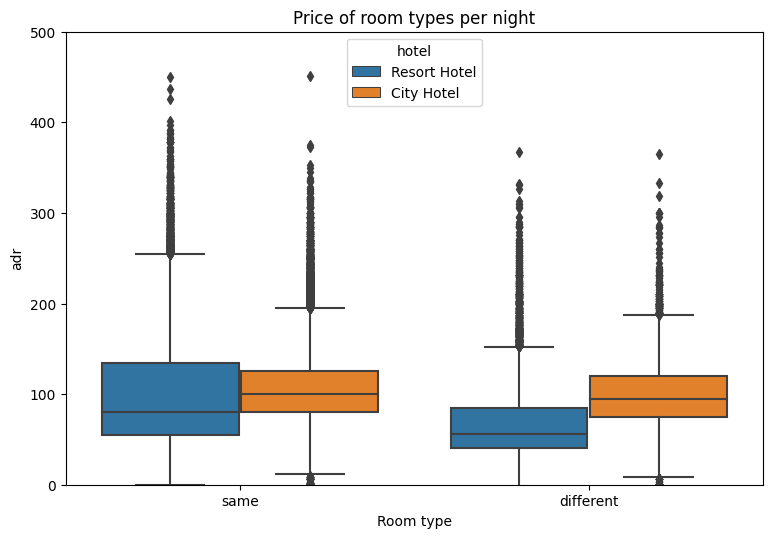

In [18]:
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= clean_copy, x = 'reserved_assigned_room_type', y = 'adr', hue = 'hotel')
plt.title('Price of room types per night')
plt.xlabel('Room type')
plt.ylim((0,500))
plt.show()

This figure shows the average price per room, depending on its type and the standard deviation. Room H has the highest price for resort hotel, while Room G has the highest price for city hotel.

#### How much do guests pay for a room per night over the year?

In [19]:
monthly_data = clean_copy[['hotel', 'arrival_date_month', 'adr']]

In [20]:
city = monthly_data[monthly_data['hotel'] == 'City Hotel']
resort = monthly_data[monthly_data['hotel'] == 'Resort Hotel']

ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

# For city hotel:
c_group = city.groupby(['arrival_date_month']).mean()
c_group['arrival_date_month'] = c_group.index
c_group['arrival_date_month'] = pd.Categorical(c_group['arrival_date_month'], categories=ordered_months, ordered=True)
c_group['hotel'] = 'City Hotel'

# For resort hotel:
r_group = resort.groupby(['arrival_date_month']).mean()
r_group['arrival_date_month'] = r_group.index
r_group['arrival_date_month'] = pd.Categorical(r_group['arrival_date_month'], categories=ordered_months, ordered=True)
r_group['hotel'] = 'Resort Hotel'

# Concat city and resort hotel
group = pd.concat([c_group, r_group], axis = 0, ignore_index = True)

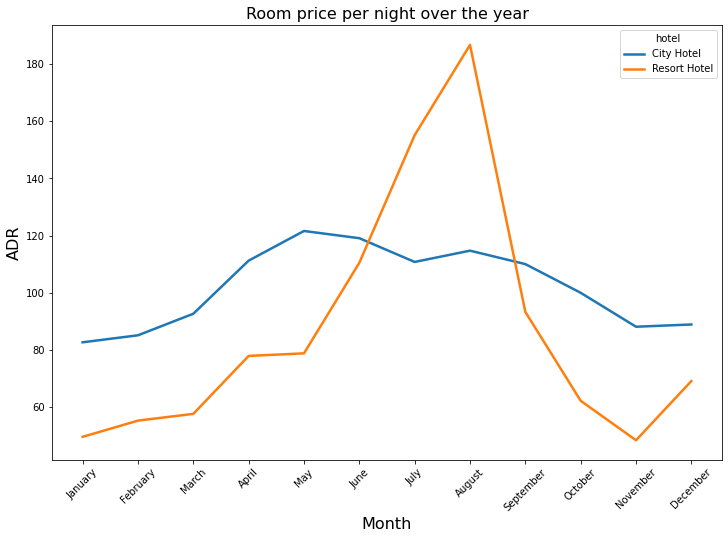

In [21]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=group, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR", fontsize=16)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the summer. The price of the city hotel varies less and is most expensive during spring and autumn.

#### How long do people stay at the hotels?

In [22]:
guest['total_nights'] = guest['stays_in_week_nights']
guest = guest[guest['total_nights'] != 0]
city = guest[guest['hotel'] == 'City Hotel']
resort = guest[guest['hotel'] == 'Resort Hotel']

num_night_rh = list(resort['total_nights'].value_counts().index)
num_rh_booking = list(resort['total_nights'].value_counts())
per_booking_rh = round(resort['total_nights'].value_counts() / sum(num_rh_booking) * 100, 2) # conver to percent

num_night_city = list(city['total_nights'].value_counts().index)
num_city_booking = list(city['total_nights'].value_counts())
per_booking_city = round(city['total_nights'].value_counts() / sum(num_city_booking) * 100, 2)

res_nights = pd.DataFrame({'hotel': 'Resort hotel',
                           'num_nights': num_night_rh,
                           'rel_num_bookings%': per_booking_rh})

city_nights = pd.DataFrame({'hotel': 'City hotel',
                            'num_nights': num_night_city,
                            'rel_num_bookings%': per_booking_city})

night_data = pd.concat([res_nights, city_nights], ignore_index = True)

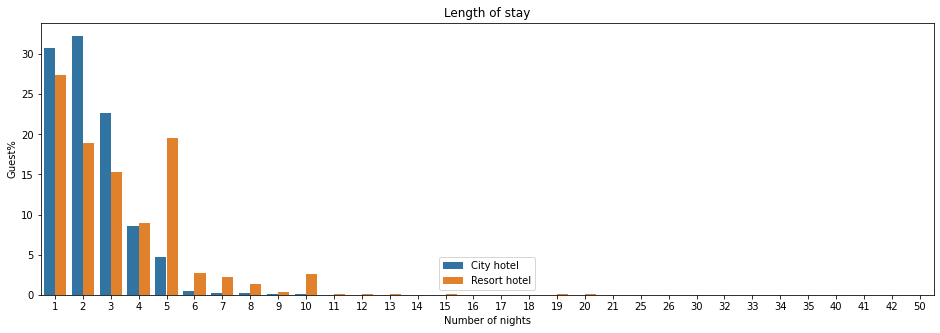

In [23]:
# Bar chart
plt.figure(figsize = (16, 5))
sns.barplot( x = 'num_nights', y = 'rel_num_bookings%', data = night_data, hue = 'hotel', hue_order = ['City hotel', 'Resort hotel'])
plt.title('Length of stay')
plt.xlabel('Number of nights')
plt.ylabel('Guest%')
plt.legend()
plt.show()

For the city hotel there is a clear preference for 1-3 nights.
For the resort hotel, 1-4 nights are also often booked, but 7 nights also stand out as being very popular.

#### How does the cancellation ratio vary over the year?

In [24]:
date_data = clean_copy[['hotel', 'is_canceled', 'arrival_date_month_year']]
city = date_data[date_data['hotel'] == 'City Hotel']
resort = date_data[date_data['hotel'] == 'Resort Hotel']

c_group = city.groupby(['is_canceled']).count()
c_group['is_canceled'] = c_group.index
c_group['hotel'] = 'City Hotel'

r_group = resort.groupby(['is_canceled']).count()
r_group['is_canceled'] = r_group.index
r_group['hotel'] = 'Resort Hotel'

group = pd.concat([c_group, r_group], axis = 0, ignore_index = True)
group

hotel  arrival_date_month_year  is_canceled
0    City Hotel                    46091            0
1    City Hotel                    33068            1
2  Resort Hotel                    28927            0
3  Resort Hotel                    11120            1

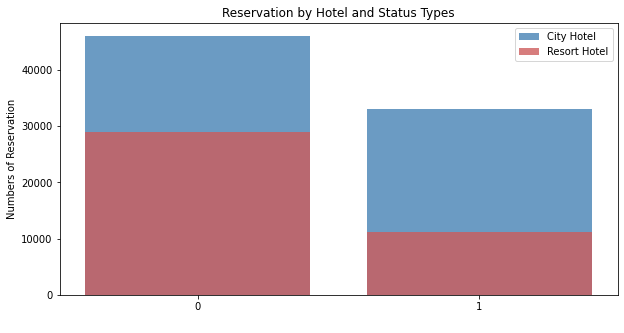

In [25]:
x = ['0', '1']
y1 = [46084, 33079]
y2 = [28927, 11120]
plt.figure(figsize=(10, 5))
plt.bar(x, y1, label='City Hotel', color='steelblue', alpha=0.8)
plt.bar(x, y2, label='Resort Hotel', color='indianred', alpha=0.8)
plt.title('Reservation by Hotel and Status Types')
plt.xlabel(' ')
plt.ylabel('Numbers of Reservation')
plt.legend()
plt.show()

There are more cancellations in city hotel.

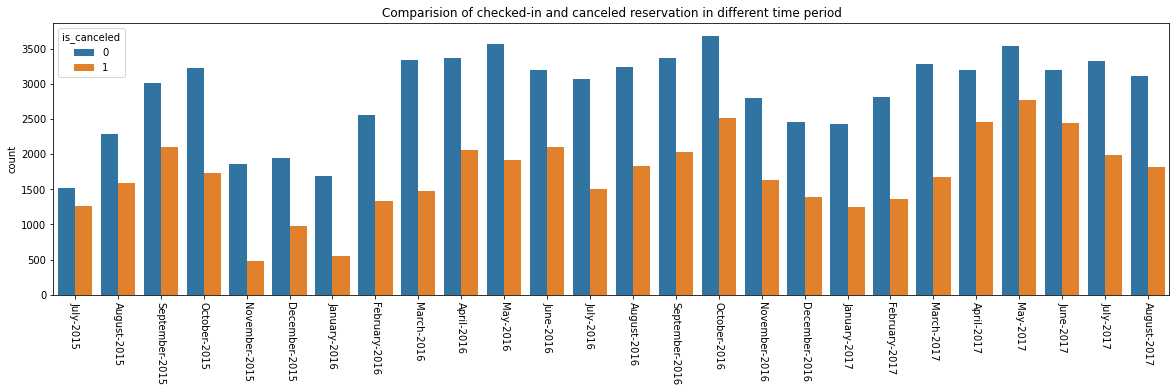

In [26]:
plt.figure(figsize = (20, 5))
sns.countplot(data=date_data, x= 'arrival_date_month_year', hue='is_canceled')
plt.xlabel('')
plt.title("Comparision of checked-in and canceled reservation in different time period")
plt.xticks(rotation = 270)
plt.show()


In [27]:
checkin = date_data[date_data['is_canceled'] == 0]
canceled = date_data[date_data['is_canceled'] == 1]

c_group = checkin.groupby(['arrival_date_month_year']).count()
c_group['arrival_date_month_year'] = c_group.index
c_group['is_canceled'] = 0
c_group = c_group.reset_index(drop = True)

can_group = canceled.groupby(['arrival_date_month_year']).count()
can_group['arrival_date_month_year'] = can_group.index
can_group['is_canceled'] = 1
can_group = can_group.reset_index(drop = True)

combine_data = pd.merge(c_group, can_group, on = 'arrival_date_month_year')
combine_data['Cancelation Ratio %'] = combine_data['hotel_y'] / (combine_data['hotel_x'] + combine_data['hotel_y']) * 100

ordered_date = ["July-2015", "August-2015", "September-2015", "October-2015", "November-2015", "December-2015", 
          "January-2016", "February-2016", "March-2016", "April-2016", "May-2016", "June-2016", "July-2016",
          "August-2016", "September-2016", "October-2016", "November-2016", "December-2016", "January-2017",
          "Feburary-2017", "March-2017", "April-2017", "May-2017", "June-2017", "July-2017", "August-2017"]

combine_data['arrival_date_month_year'] = pd.Categorical(combine_data['arrival_date_month_year'], categories=ordered_date, ordered=True)
combine_data.head()

hotel_x  is_canceled_x arrival_date_month_year  hotel_y  is_canceled_y  \
0     3366              0              April-2016     2060              1   
1     3193              0              April-2017     2459              1   
2     2285              0             August-2015     1594              1   
3     3235              0             August-2016     1824              1   
4     3109              0             August-2017     1814              1   

   Cancelation Ratio %  
0            37.965352  
1            43.506723  
2            41.093065  
3            36.054556  
4            36.847451

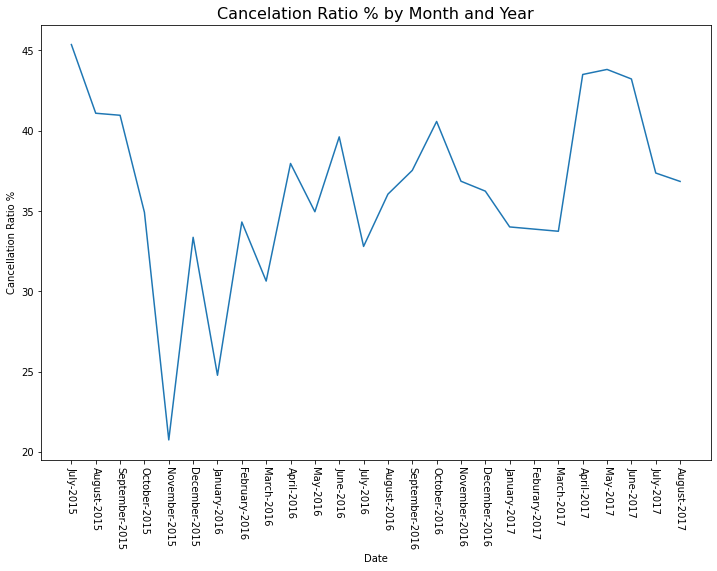

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month_year", y="Cancelation Ratio %", data= combine_data)
plt.title("Cancelation Ratio % by Month and Year", fontsize=16)
plt.xlabel('Date')
plt.xticks(rotation=270)
plt.ylabel("Cancellation Ratio %")
plt.show()

There are more bookings in spring and summer. Therefore,there are more cancellations in spring and summer than winter. 

#### Bookings by market segment

In [29]:
market_data = clean_data[['is_canceled', 'market_segment', 'adr']]
cancel = market_data[market_data['is_canceled'] == 1]
cancel_market = pd.DataFrame(cancel['market_segment'].value_counts())
cancel_market['market'] = cancel_market.index

reserve = market_data[market_data['is_canceled'] == 0]
reserve_market = pd.DataFrame(reserve['market_segment'].value_counts())
reserve_market['market'] = reserve_market.index

In [30]:
# Distribution of CheckIn and Cancellation reservation by market segment
fig = px.pie(reserve_market, values='market_segment', names='market', hole = 0.4, title='CheckIn')
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.update_layout(
    title_text="Distribution of CheckIn Reservation by Market Segment", 
    annotations=[dict(text='CheckIn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()




In [31]:
fig = px.pie(cancel_market, values='market_segment', names='market', hole = 0.4, title='Canceled')
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.update_layout(
    title_text="Distribution of Canceled Reservation by Market Segment", 
    annotations=[dict(text='Canceled', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

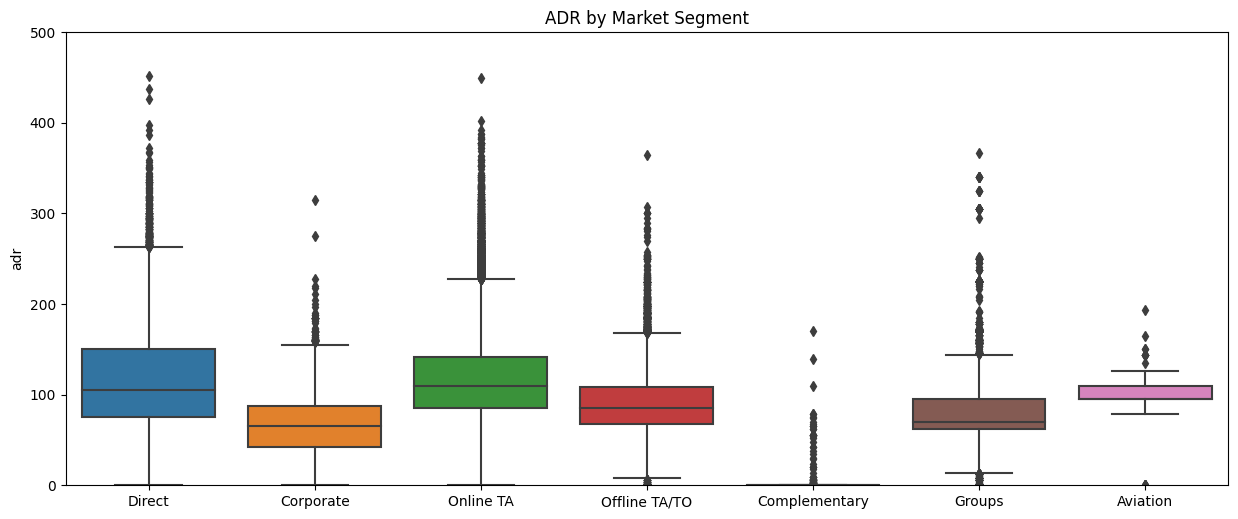

In [32]:
fig = plt.figure(figsize=(15,6), dpi = 100)
sns.boxplot(data= market_data, x = 'market_segment', y = 'adr')
plt.title('ADR by Market Segment')
plt.ylim(0, 500)
plt.xlabel('')
plt.show()

Most guests of checkin reservation booked hotels from online TA and offline Ta. Most guests cancel their reservation by online TA and groups. Of all market segments, reservations by online TA and direct reservation have higher adr compare to other market segments. 

#### Is there a relationship between the time we booked the vacation till the actual arrival date and customer cancellation (cancellation and lead time)?

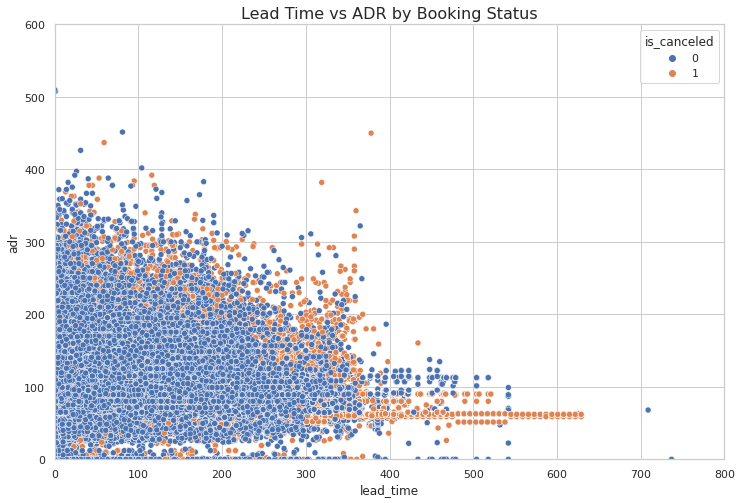

In [33]:
# Lead time vs ADR by booking status
lead_data = clean_data[['is_canceled', 'lead_time', 'adr']]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x="lead_time",y="adr", data=lead_data, hue = 'is_canceled')
plt.title("Lead Time vs ADR by Booking Status", fontsize=16)
plt.xlabel('lead_time')
plt.xlim(0,800)
plt.ylim(0,600)
plt.ylabel('adr')
plt.show()

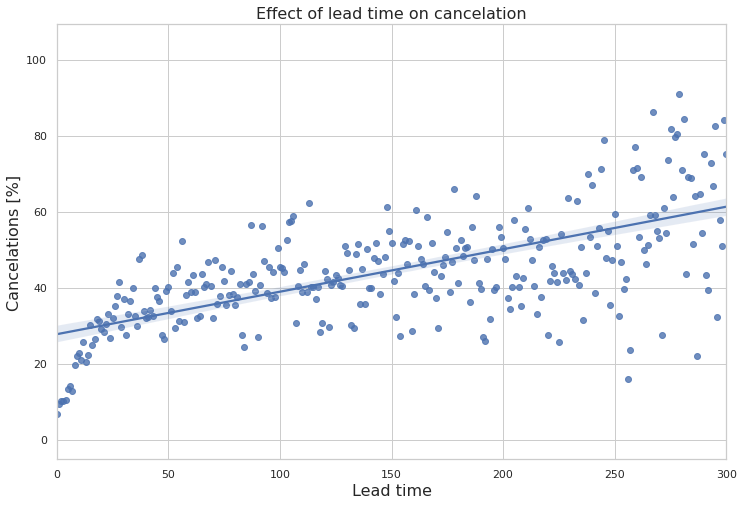

In [34]:
# Cancellation and Lead time
lead_cancel_data = clean_data.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data[lead_cancel_data["count"] >= 10]

#Line plot
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,300)
plt.show()

Based on these two plots, the longer the lead time, the cancellation ratio is higher. The regression plot clearly showed the positive association between lead time and cancellation ratio.

#### Correlation Heatmap

### Feature Engineering

We will use Filter Method for Feature Selection: 
1. Remove low correlation of features with the target variable.
2. Remove variables contain a lot of varieties.
2. Remove linearly dependent variables.
3. Remove Constant features (variance threshold = 0)
4. Remove Quasi-Constant Features (variance threshold = 0.01)


1. Check linearly dependent variables


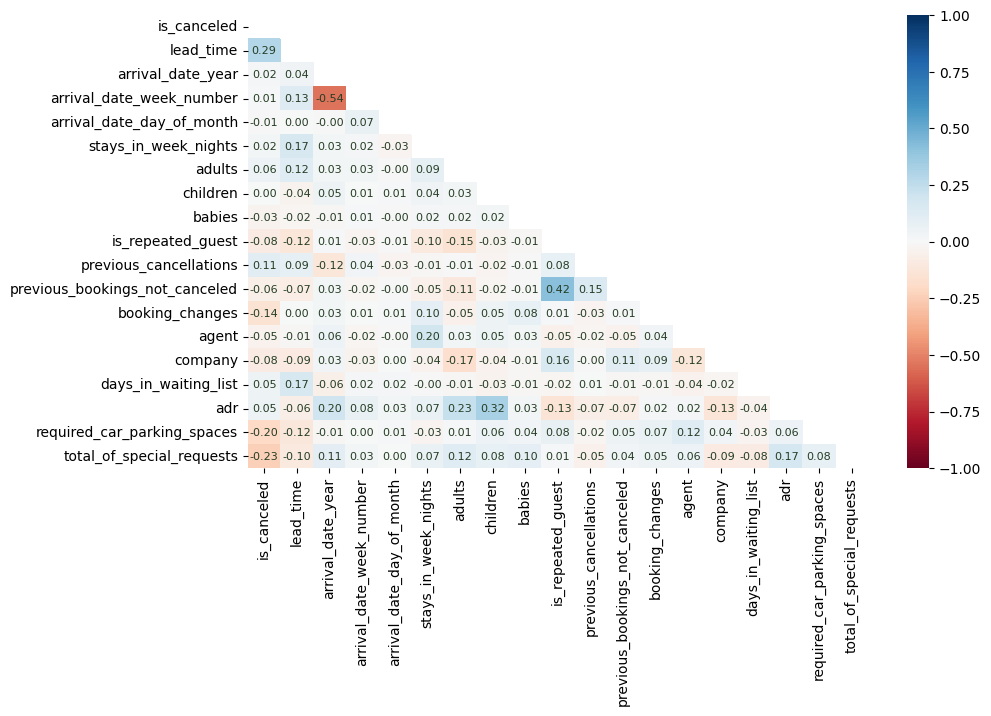

In [10]:
data_corr = clean_data.corr()

plt.figure(figsize=(10, 6),dpi=100)
sns.heatmap(data= data_corr,
            vmin= -1,
            vmax= 1.0, 
            cmap= 'RdBu',
            annot=True,
            fmt=".2f",
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
            mask=np.triu(np.ones_like(data_corr,dtype=np.bool))            
           )

If 2 variables have a correlation coefficient larger than 0.5, eliminate one to avoid redundency.
Based on the correlation matrix,'arrival_date_week_number' and 'arrival_date_year' are linearly dependent variables. Drop variable 'arrival_date_week_number'.

In [11]:
# Drop 'arrival_date_week_number'
clean_df = clean_data.drop(['arrival_date_week_number'], axis = 1)

2. Correlation of Features with the Target Variable

We want to keep features with only a high correlation with the target variable. This implies that the input feature has a high influence in predicting the target variable.
We set the threshold to the absolute value of 0.01. We keep input features only if the correlation of the input feature with the target variable is greater than 0.01. 
* Although the correlation value of arrivial_date_day_of_month is less than 0.01, the this variable is essential in predicting the relationship between is_cancel and arrivial season. So we keep this variable in further investigation. 

In [12]:
# Check the correlation between outcome variable and independent variables (feature weights)
data_corr = clean_df.corr()
data_corr['is_canceled'].sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.293203
previous_cancellations            0.110151
adults                            0.059921
days_in_waiting_list              0.054257
adr                               0.047541
stays_in_week_nights              0.024859
arrival_date_year                 0.016896
children                          0.004931
arrival_date_day_of_month        -0.005935
babies                           -0.032453
agent                            -0.046806
previous_bookings_not_canceled   -0.057306
company                          -0.083188
is_repeated_guest                -0.084691
booking_changes                  -0.144303
required_car_parking_spaces      -0.195700
total_of_special_requests        -0.234759
Name: is_canceled, dtype: float64

In [13]:
# Drop variable 'children'
clean_df = clean_df.drop(['children'], axis = 1)

3. Check if columns contain a lot of variety. Creating numerical and categorical columns

In [14]:
# Creating numerical and categorical dataframe
cat_cols = ['hotel', 'is_canceled', 'company', 'arrival_date_year',
            'arrival_date_month', 'arrival_date_day_of_month',
            'meal', 'country', 'market_segment','distribution_channel',
             'customer_type', 'reservation_status_date',
             'reserved_assigned_room_type', 'deposit_type', 'agent', 'is_repeated_guest']
cat_df = clean_df[cat_cols]
cat_df.head()

hotel  is_canceled  company  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        0               2015               July   
1  Resort Hotel            0        0               2015               July   
2  Resort Hotel            0        0               2015               July   
3  Resort Hotel            0        0               2015               July   
4  Resort Hotel            0        0               2015               July   

   arrival_date_day_of_month meal country market_segment distribution_channel  \
0                          1   BB     PRT         Direct               Direct   
1                          1   BB     PRT         Direct               Direct   
2                          1   BB     GBR         Direct               Direct   
3                          1   BB     GBR      Corporate            Corporate   
4                          1   BB     GBR      Online TA                TA/TO   

  customer_type reservation_status_date reserved_assigned_room_type  \
0     Transient              2015-07-01                        same   
1     Transient              2015-07-01                        same   
2     Transient              2015-07-02                   different   
3     Transient              2015-07-02                        same   
4     Transient              2015-07-03                        same   

  deposit_type  agent  is_repeated_guest  
0   No Deposit      0                  0  
1   No Deposit      0                  0  
2   No Deposit      0                  0  
3   No Deposit    304                  0  
4   No Deposit    240                  0

In [15]:
# Separate column 'reservation_status_date' into year month date format
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['r_year'] = cat_df['reservation_status_date'].dt.year
cat_df['r_month'] = cat_df['reservation_status_date'].dt.month
cat_df['r_day'] = cat_df['reservation_status_date'].dt.day
cat_df.drop(['reservation_status_date'] , axis = 1, inplace = True)
cat_df.head()

hotel  is_canceled  company  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        0               2015               July   
1  Resort Hotel            0        0               2015               July   
2  Resort Hotel            0        0               2015               July   
3  Resort Hotel            0        0               2015               July   
4  Resort Hotel            0        0               2015               July   

   arrival_date_day_of_month meal country market_segment distribution_channel  \
0                          1   BB     PRT         Direct               Direct   
1                          1   BB     PRT         Direct               Direct   
2                          1   BB     GBR         Direct               Direct   
3                          1   BB     GBR      Corporate            Corporate   
4                          1   BB     GBR      Online TA                TA/TO   

  customer_type reserved_assigned_room_type deposit_type  agent  \
0     Transient                        same   No Deposit      0   
1     Transient                        same   No Deposit      0   
2     Transient                   different   No Deposit      0   
3     Transient                        same   No Deposit    304   
4     Transient                        same   No Deposit    240   

   is_repeated_guest  r_year  r_month  r_day  
0                  0    2015        7      1  
1                  0    2015        7      1  
2                  0    2015        7      2  
3                  0    2015        7      2  
4                  0    2015        7      3

In [16]:
# print unique value of each column in cat_df
for col in cat_df.columns:
  print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

is_canceled: 
[0 1]

company: 
[  0 110 113 270 178 240 154 144 307 268  59 204 312 318  94 274 174 195
 223 317 281 118  53 286  12  47 324 342 373 371  86  82 218  88  31 397
 392 405 331 367  20  83 416  51 395 102  34  84 360 394 457 382 461 478
 112 486 421   9 308 135 224 504 269 356 498 390 513 203 263 477 521 169
 515 445 337 251 428 292 388 130 250 355 254 543 531 528  62 120  42  81
 116 530 103  39  16  92  61 501 165 291 290  43 325 192 108 200 465 287
 297 490 482 207 282 437 225 329 272  28  77 338  72 246 319 146 159 380
 323 511 407 278  80 403 399  14 137 343 346 347 349 289 351 353  54  99
 358 361 362 366 372 365 277 109 377 379  22 378 330 364 401 232 255 384
 167 212 514 391 400 376 402 396 302 398   6 370 369 409 168 104 408 413
 148  10 333 419 415 424 425 423 422 435 439 442 448 443 454 444  52 459
 458 456 460 447 470 466 484 184 485  32 487 491 494 193 516 496 499  29
  78 520 507 506 512 126  64 242 518 523 539 534 436 5

Because columns 'company' and 'country' contain a lot of variety, we will remove them in model building. 


In [17]:
# Remove columns 'company', 'agent' and 'country'
cat_df = cat_df.drop(['company', 'agent', 'country'], axis = 1)

Then, we will encode the categorical variables:
* 'hotel': Resort hotel as 1, City hotel as 0
* 'arrival_date_year': 2015:0, 2016:1, 2017:2
* 'r_year': 2014:3, 2015:0, 2016:1, 2017:2
* 'meal': 'BB':0, 'FB':1, 'HB':2, 'SC':3, 'Undefined': 4
* 'market_segment': 'Direct':0, 'Corporate': 1, 'Online TA':2, 'Offline TA/TO':3, 'Complementary':4, 'Groups':5,  'Undefined': 6, 'Aviation': 7
* 'distribution_channel': 'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined':3,                    'GDS': 4
* 'customer_type': 'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3
* 'reserved_assigned_room_type': 
'same':0, 'different':1
* 'deposit_type': 'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3
* ‘arrival_date_month': Jan to Dec: 1:12

In [18]:
# encoding categorical variables
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                          'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})
cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})
cat_df['reserved_assigned_room_type'] = cat_df['reserved_assigned_room_type'].map({'same':0, 'different':1})
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['arrival_date_year'] = cat_df['arrival_date_year'].astype('str')
cat_df['r_year'] = cat_df['r_year'].astype('str')
cat_df['arrival_date_year'] = cat_df['arrival_date_year'].map({'2015':0, '2016':1, '2017':2})
cat_df['r_year'] = cat_df['r_year'].map({'2015':0, '2016':1, '2017':2, '2014':3})
cat_df['arrival_date_month'] = cat_df['arrival_date_month'].map({'July':7, 'August':8,
                                                                 'September':9, 'October':10,
                                                                 'November':11, 'December':12,
                                                                 'January':1, 'February':2,
                                                                 'March':3, 'April':4,
                                                                 'May':5, 'June':6})

cat_df.head()

hotel  is_canceled  arrival_date_year  arrival_date_month  \
0      0            0                  0                   7   
1      0            0                  0                   7   
2      0            0                  0                   7   
3      0            0                  0                   7   
4      0            0                  0                   7   

   arrival_date_day_of_month  meal  market_segment  distribution_channel  \
0                          1     0               0                     0   
1                          1     0               0                     0   
2                          1     0               0                     0   
3                          1     0               1                     1   
4                          1     0               2                     2   

   customer_type  reserved_assigned_room_type  deposit_type  \
0              0                            0             0   
1              0                            0             0   
2              0                            1             0   
3              0                            0             0   
4              0                            0             0   

   is_repeated_guest  r_year  r_month  r_day  
0                  0       0        7      1  
1                  0       0        7      1  
2                  0       0        7      2  
3                  0       0        7      2  
4                  0       0        7      3

In [19]:
# create numerical df
num_df = clean_df.drop(columns = cat_cols, axis = 1)
num_df.head()

lead_time  stays_in_week_nights  adults  babies  previous_cancellations  \
0        342                     0       2       0                       0   
1        737                     0       2       0                       0   
2          7                     1       1       0                       0   
3         13                     1       1       0                       0   
4         14                     2       2       0                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                3                     0   
1                               0                4                     0   
2                               0                0                     0   
3                               0                0                     0   
4                               0                0                     0   

    adr  required_car_parking_spaces  total_of_special_requests  
0   0.0                            0                          0  
1   0.0                            0                          0  
2  75.0                            0                          0  
3  75.0                            0                          0  
4  98.0                            0                          1

So far, we can get the temperatory independent and dependent variables:

In [20]:
df_temp = pd.concat([num_df, cat_df], axis=1)

outcome = df_temp['is_canceled']
predictor = df_temp.drop(['is_canceled'], axis = 1)

4. Removing Constant Features using VarianceThreshold
* Passing a value of zero for the parameter will filter all the features with zero variance

In [21]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

data_constant = constant_filter.fit_transform(predictor)

constant_columns = [column for column in predictor.columns
                    if column not in predictor.columns[constant_filter.get_support()]]
#No. of constant columns
print(len(constant_columns))        

0


5. Removing Quasi-Constant Features
* Quasi-constant features, as the name suggests, are the features that are almost constant. Such features are not very useful for making predictions. There is no rule as to what should be the threshold for the variance of quasi-constant features.
* However, as a rule of thumb, remove those quasi-constant features that have more than 99% similar values for the output observations.
* Thus, instead of passing 0 as the value for the threshold parameter, we will pass 0.01, which means that if the variance of the values in a column is less than 0.01, remove that column. In other words, remove the feature column where approximately 99% of the values are similar.

In [22]:
qcons_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(predictor)
#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in predictor.columns
                    if column not in predictor.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

1
babies


In [23]:
# Drop variable 'babies'
predictor_qcons = predictor.drop(qcons_columns,axis=1)

Therefore, the final predictors and outcome are:
* Predictor: 'lead_time', 'stays_in_week_nights', 'adults', 'children', 'is_repeated_guest', 'adr', 'hotel', 'arrival_date_year','arrival_date_day_of_month', 'meal', 'market_segment', 'distribution_channel', 'customer_type', 'reservation_status', 'reserved_assigned_room_type', 'deposit_type', 'r_year', 'r_month','r_day'
* Outcome: 'is_canceled'

In [24]:
y = df_temp['is_canceled']
X = df_temp[predictor_qcons.columns]
df = pd.concat([X, y], axis=1)
df.head()

lead_time  stays_in_week_nights  adults  previous_cancellations  \
0        342                     0       2                       0   
1        737                     0       2                       0   
2          7                     1       1                       0   
3         13                     1       1                       0   
4         14                     2       2                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                3                     0   
1                               0                4                     0   
2                               0                0                     0   
3                               0                0                     0   
4                               0                0                     0   

    adr  required_car_parking_spaces  total_of_special_requests  ...  \
0   0.0                            0                          0  ...   
1   0.0                            0                          0  ...   
2  75.0                            0                          0  ...   
3  75.0                            0                          0  ...   
4  98.0                            0                          1  ...   

   market_segment  distribution_channel  customer_type  \
0               0                     0              0   
1               0                     0              0   
2               0                     0              0   
3               1                     1              0   
4               2                     2              0   

   reserved_assigned_room_type  deposit_type  is_repeated_guest  r_year  \
0                            0             0                  0       0   
1                            0             0                  0       0   
2                            1             0                  0       0   
3                            0             0                  0       0   
4                            0             0                  0       0   

   r_month  r_day  is_canceled  
0        7      1            0  
1        7      1            0  
2        7      2            0  
3        7      2            0  
4        7      3            0  

[5 rows x 25 columns]

#Model Experiments

We splited the original data set in to Training set and Testing set with the 0.3 ratio.

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

**Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
# Tune Hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty': ['none','l1','l2'],
              'C': [100, 10, 1.0, 0.1, 0.01]}

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search = grid_search.fit(x_train, y_train)
print('Best parameters : {}'.format(grid_search.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_search.best_score_))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters : {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
Best accuracy score : 0.89940560


In [27]:
lr = LogisticRegression(C = 100, penalty = 'l2', solver = 'liblinear')
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9029696325708853
Confusion Matrix : 
[[22406    42]
 [ 3428  9886]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     22448
           1       1.00      0.74      0.85     13314

    accuracy                           0.90     35762
   macro avg       0.93      0.87      0.89     35762
weighted avg       0.92      0.90      0.90     35762



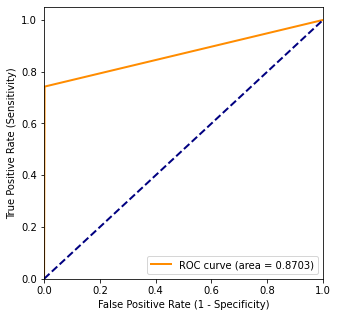

In [29]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

def rocPlot(p):
  fpr, tpr, _ = roc_curve(y_test, p)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=[5, 5])
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.legend(loc="lower right")
  plt.show()

rocPlot(y_pred_lr)

In [35]:
# Cross Validation
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits = 10)
f1 = cross_val_score(lr, X, y, scoring="f1", cv = kf)
acc = cross_val_score(lr, X, y, scoring="accuracy", cv = kf)
preci = cross_val_score(lr, X, y, scoring="precision", cv = kf)
recall = cross_val_score(lr, X, y, scoring="recall", cv = kf)
roc_auc = cross_val_score(lr, X, y, scoring="roc_auc", cv = kf)

print("Mean F1 score are {}".format(f1.mean()))
print("Std F1 score :{}".format(f1.std()))
print("Mean accuracy : {}".format(acc.mean()))
print("Std accuracy :{}".format(acc.std()))
print("Mean precision : {}".format(preci.mean()))
print("Std precision :{}".format(preci.std()))
print("Mean recall : {}".format(recall.mean()))
print("Std recall score :{}".format(recall.std()))
print("Mean roc_auc : {}".format(roc_auc.mean()))
print("Std roc_auc score :{}".format(roc_auc.std()))


Mean F1 score are 0.5219294212238752
Std F1 score :0.3320023852466122
Mean accuracy : 0.8582910769106912
Std accuracy :0.15450000683051054
Mean precision : 0.6393343243021152
Std precision :0.4326804876380838
Mean recall : 0.523864173223604
Std recall score :0.23491211651841118
Mean roc_auc : 0.7734176757439697
Std roc_auc score :0.21629028036516862


**K Neighbors**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# Tune Hyperparameters
parameters = {'metric': ['euclidean', 'manhattan', 'minkowski'],
              'n_neighbors': [5, 10, 15, 20]}

grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search = grid_search.fit(x_train, y_train)
print('Best parameters : {}'.format(grid_search.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters : {'metric': 'manhattan', 'n_neighbors': 5}
Best accuracy score : 0.89063322


In [31]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8953917566131648
Confusion Matrix : 
[[21765   683]
 [ 3058 10256]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     22448
           1       0.94      0.77      0.85     13314

    accuracy                           0.90     35762
   macro avg       0.91      0.87      0.88     35762
weighted avg       0.90      0.90      0.89     35762



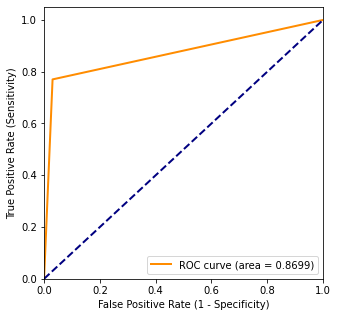

In [32]:
# ROC curve
rocPlot(y_pred_knn)

In [55]:
# Cross Validation
kf = KFold(n_splits = 10)
f1 = cross_val_score(knn, X, y, scoring="f1", cv = kf)
acc = cross_val_score(knn, X, y, scoring="accuracy", cv = kf)
preci = cross_val_score(knn, X, y, scoring="precision", cv = kf)
recall = cross_val_score(knn, X, y, scoring="recall", cv = kf)
roc_auc = cross_val_score(knn, X, y, scoring="roc_auc", cv = kf)

print("Mean F1 score are {}".format(f1.mean()))
print("Std F1 score :{}".format(f1.std()))
print("Mean accuracy : {}".format(acc.mean()))
print("Std accuracy :{}".format(acc.std()))
print("Mean precision : {}".format(preci.mean()))
print("Std precision :{}".format(preci.std()))
print("Mean recall : {}".format(recall.mean()))
print("Std recall score :{}".format(recall.std()))
print("Mean roc_auc : {}".format(roc_auc.mean()))
print("Std roc_auc score :{}".format(roc_auc.std()))

Mean F1 score are 0.3593527460561692
Std F1 score :0.2927020872674882
Mean accuracy : 0.7046225930046182
Std accuracy :0.14766557852390672
Mean precision : 0.5259118221877291
Std precision :0.4399481855547883
Mean recall : 0.3562493393931108
Std recall score :0.15606286497882957
Mean roc_auc : 0.6722614701845078
Std roc_auc score :0.14373320880795606


Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
parameters = {"splitter":["best","random"],
              "max_features":["auto","log2","sqrt",None],
              "max_leaf_nodes":[None,10,30,50,70,90]}

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search = grid_search.fit(x_train, y_train)
print('Best parameters : {}'.format(grid_search.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_search.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters : {'max_features': None, 'max_leaf_nodes': None, 'splitter': 'best'}
Best accuracy score : 0.94411819


In [35]:
dtc = DecisionTreeClassifier(max_features = None, max_leaf_nodes = None, splitter = 'best')
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.95061797438622
Confusion Matrix : 
[[21583   865]
 [  901 12413]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22448
           1       0.93      0.93      0.93     13314

    accuracy                           0.95     35762
   macro avg       0.95      0.95      0.95     35762
weighted avg       0.95      0.95      0.95     35762



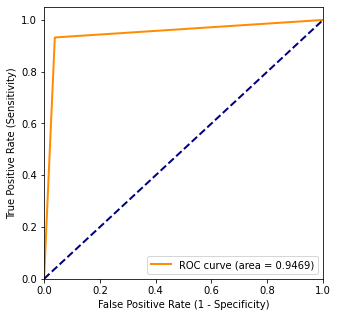

In [36]:
# ROC curve
rocPlot(y_pred_dtc)

     |████████████████████████████████| 11.8 MB 836 kB/s 
no display found. Using non-interactive Agg backend
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.179411 to fit



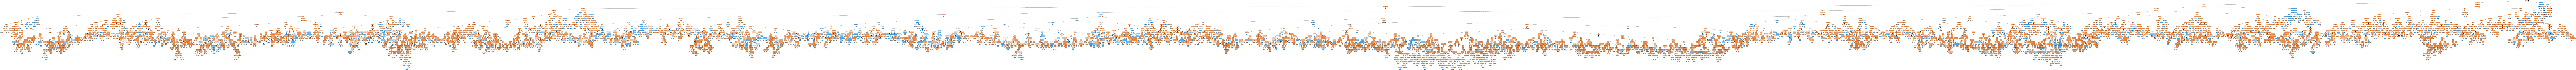

In [37]:
# Tree
!pip install dmba
from dmba import plotDecisionTree

plotDecisionTree(dtc, feature_names=X.columns, class_names=dtc.classes_)

In [39]:
# Cross Validation
kf = KFold(n_splits = 10)
f1 = cross_val_score(dtc, X, y, scoring="f1", cv = kf)
acc = cross_val_score(dtc, X, y, scoring="accuracy", cv = kf)
preci = cross_val_score(dtc, X, y, scoring="precision", cv = kf)
recall = cross_val_score(dtc, X, y, scoring="recall", cv = kf)
roc_auc = cross_val_score(dtc, X, y, scoring="roc_auc", cv = kf)

print("Mean F1 score are {}".format(f1.mean()))
print("Std F1 score :{}".format(f1.std()))
print("Mean accuracy : {}".format(acc.mean()))
print("Std accuracy :{}".format(acc.std()))
print("Mean precision : {}".format(preci.mean()))
print("Std precision :{}".format(preci.std()))
print("Mean recall : {}".format(recall.mean()))
print("Std recall score :{}".format(recall.std()))
print("Mean roc_auc : {}".format(roc_auc.mean()))
print("Std roc_auc score :{}".format(roc_auc.std()))

Mean F1 score are 0.3661883500832369
Std F1 score :0.3262021998656131
Mean accuracy : 0.5540889012621683
Std accuracy :0.19640715610295725
Mean precision : 0.47834237289689774
Std precision :0.43671813008780525
Mean recall : 0.5062188864180474
Std recall score :0.20772348144740527
Mean roc_auc : 0.585100168122705
Std roc_auc score :0.2173391918358965


Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
parameters = {'n_estimators': [10, 100, 1000],
              'max_features': ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search = grid_search.fit(x_train, y_train)
print('Best parameters : {}'.format(grid_search.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_search.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters : {'max_features': 'sqrt', 'n_estimators': 1000}
Best accuracy score : 0.95184795


In [39]:
rd_clf = RandomForestClassifier(max_features = 'sqrt', n_estimators = 1000)
rd_clf.fit(x_train, y_train)

y_pred_rd_clf = rd_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9560706895587495
Confusion Matrix : 
[[22317   131]
 [ 1440 11874]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     22448
           1       0.99      0.89      0.94     13314

    accuracy                           0.96     35762
   macro avg       0.96      0.94      0.95     35762
weighted avg       0.96      0.96      0.96     35762



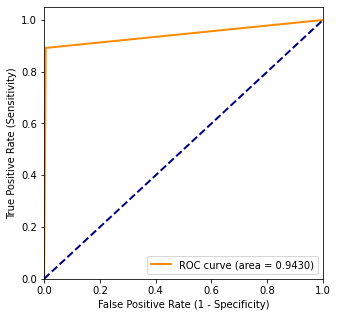

In [40]:
# ROC curve
rocPlot(y_pred_rd_clf)

In [29]:
# Cross Validation
kf = KFold(n_splits = 10)
f1 = cross_val_score(rd_clf, X, y, scoring="f1", cv = kf)
acc = cross_val_score(rd_clf, X, y, scoring="accuracy", cv = kf)
preci = cross_val_score(rd_clf, X, y, scoring="precision", cv = kf)
recall = cross_val_score(rd_clf, X, y, scoring="recall", cv = kf)
roc_auc = cross_val_score(rd_clf, X, y, scoring="roc_auc", cv = kf)

print("Mean F1 score are {}".format(f1.mean()))
print("Std F1 score :{}".format(f1.std()))
print("Mean accuracy : {}".format(acc.mean()))
print("Std accuracy :{}".format(acc.std()))
print("Mean precision : {}".format(preci.mean()))
print("Std precision :{}".format(preci.std()))
print("Mean recall : {}".format(recall.mean()))
print("Std recall score :{}".format(recall.std()))
print("Mean roc_auc : {}".format(roc_auc.mean()))
print("Std roc_auc score :{}".format(roc_auc.std()))

Mean F1 score are 0.3587476964221598
Std F1 score :0.33078486753866393
Mean accuracy : 0.5439460058359592
Std accuracy :0.22539474909760568
Mean precision : 0.4972284342700367
Std precision :0.44738279628270117
Mean recall : 0.4165086083920005
Std recall score :0.23113932818265687
Mean roc_auc : 0.6314985614741511
Std roc_auc score :0.34140049097366454


AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
parameters = {'n_estimators': [50, 70, 90, 110],
              'learning_rate': [0.001, 0.01, 0.1, 1.0],
              'algorithm': ['SAMME', 'SAMME.R']}

grid_search = GridSearchCV(estimator = AdaBoostClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search = grid_search.fit(x_train, y_train)
print('Best parameters : {}'.format(grid_search.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_search.best_score_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters : {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 110}
Best accuracy score : 0.86404057


In [43]:
ada = AdaBoostClassifier(n_estimators = 110, learning_rate = 1.0, algorithm = 'SAMME.R')
ada.fit(x_train, y_train)

y_pred_ada = ada.predict(x_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8630669425647335
Confusion Matrix : 
[[21531   917]
 [ 3980  9334]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     22448
           1       0.91      0.70      0.79     13314

    accuracy                           0.86     35762
   macro avg       0.88      0.83      0.85     35762
weighted avg       0.87      0.86      0.86     35762



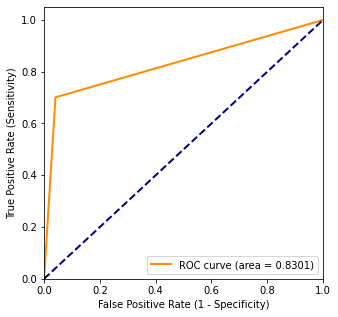

In [44]:
# ROC curve
rocPlot(y_pred_ada)

In [41]:
# Cross Validation
kf = KFold(n_splits = 10)
f1 = cross_val_score(ada, X, y, scoring="f1", cv = kf)
acc = cross_val_score(ada, X, y, scoring="accuracy", cv = kf)
preci = cross_val_score(ada, X, y, scoring="precision", cv = kf)
recall = cross_val_score(ada, X, y, scoring="recall", cv = kf)
roc_auc = cross_val_score(ada, X, y, scoring="roc_auc", cv = kf)

print("Mean F1 score are {}".format(f1.mean()))
print("Std F1 score :{}".format(f1.std()))
print("Mean accuracy : {}".format(acc.mean()))
print("Std accuracy :{}".format(acc.std()))
print("Mean precision : {}".format(preci.mean()))
print("Std precision :{}".format(preci.std()))
print("Mean recall : {}".format(recall.mean()))
print("Std recall score :{}".format(recall.std()))
print("Mean roc_auc : {}".format(roc_auc.mean()))
print("Std roc_auc score :{}".format(roc_auc.std()))

Mean F1 score are 0.3950470885935166
Std F1 score :0.33558531373754186
Mean accuracy : 0.6821464609856048
Std accuracy :0.16534899625383404
Mean precision : 0.5593558199744842
Std precision :0.45644102320160507
Mean recall : 0.475508747884361
Std recall score :0.16886019370706484
Mean roc_auc : 0.7106817798019487
Std roc_auc score :0.21952966721078873


Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
parameters = {'n_estimators': [50, 70, 90, 110],
              'learning_rate': [0.001, 0.01, 0.1, 1.0]}

grid_search = GridSearchCV(estimator = AdaBoostClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search = grid_search.fit(x_train, y_train)
print('Best parameters : {}'.format(grid_search.best_params_))
print('Best accuracy score : {:.8f}'.format(grid_search.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters : {'learning_rate': 1.0, 'n_estimators': 110}
Best accuracy score : 0.86229088


In [46]:
gb = GradientBoostingClassifier(learning_rate = 1.0, n_estimators = 110)
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of GradientBoosting Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of GradientBoosting Classifier is : 0.992114534981265
Confusion Matrix : 
[[22405    43]
 [  239 13075]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22448
           1       1.00      0.98      0.99     13314

    accuracy                           0.99     35762
   macro avg       0.99      0.99      0.99     35762
weighted avg       0.99      0.99      0.99     35762



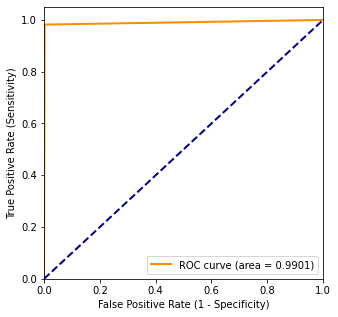

In [47]:
# ROC curve
rocPlot(y_pred_gb)

In [47]:
# Cross Validation
kf = KFold(n_splits = 10)
f1 = cross_val_score(gb, X, y, scoring="f1", cv = kf)
acc = cross_val_score(gb, X, y, scoring="accuracy", cv = kf)
preci = cross_val_score(gb, X, y, scoring="precision", cv = kf)
recall = cross_val_score(gb, X, y, scoring="recall", cv = kf)
roc_auc = cross_val_score(gb, X, y, scoring="roc_auc", cv = kf)

print("Mean F1 score are {}".format(f1.mean()))
print("Std F1 score :{}".format(f1.std()))
print("Mean accuracy : {}".format(acc.mean()))
print("Std accuracy :{}".format(acc.std()))
print("Mean precision : {}".format(preci.mean()))
print("Std precision :{}".format(preci.std()))
print("Mean recall : {}".format(recall.mean()))
print("Std recall score :{}".format(recall.std()))
print("Mean roc_auc : {}".format(roc_auc.mean()))
print("Std roc_auc score :{}".format(roc_auc.std()))

Mean F1 score are 0.6319577091350513
Std F1 score :0.42113205523811137
Mean accuracy : 0.9527702846873911
Std accuracy :0.045129728940954614
Mean precision : 0.6286803847658604
Std precision :0.4521794532065816
Mean recall : 0.8121091267225861
Std recall score :0.18595475380488527
Mean roc_auc : 0.9621535260739291
Std roc_auc score :0.04667551050819582


By comparing the results of different prediction models, we can see that models using Gradient Boosting works the best. The best testing accuracy we can get is about 95.5%

#Implementation of Selected Model

* Random Forest Classifier is the best algorithm to predict the cancellation.
* It is giving 95.5% accurate predictions nearly.

In [33]:
# Implementation of Random Forest
gb = GradientBoostingClassifier(learning_rate = 1.0, n_estimators = 110)
gb.fit(x_train, y_train)
imp_features = pd.DataFrame(data = gb.feature_importances_*100, 
                            columns = ["Importances"], 
                            index = x_train.columns)

<Figure size 360x576 with 0 Axes>

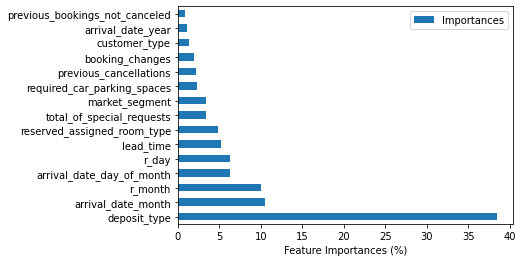

In [34]:
# Visualize the importance of each variable
plt.figure(figsize=(5, 8))
imp_features.sort_values("Importances", ascending = False)[:15].plot(kind = "barh")
plt.xlabel("Feature Importances (%)")
plt.show()

## Performance Evaluation

In [46]:
y_pred_gb = gb.predict(x_test)

In [45]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_gb).ravel()
# Recall
recall = tp/(tp+fn)
# Precision 
precision = tp/(tp+fp)
# Overall accuracy
accuracy = (tp+tn)/(tp+fp+fn+tn)
# f1 score
f1 = 2 * (precision * recall) / (precision + recall)

print('tn: ', tn)
print('fp: ', fp)
print('fn: ', fn)
print('tp: ', tp)
print('recall: ', recall)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('f1_score: ', f1)


tn:  22333
fp:  38
fn:  274
tp:  13117
recall:  0.9795384960047794
precision:  0.99711136450019
accuracy:  0.9912756557239528
f1_score:  0.9882468168462292


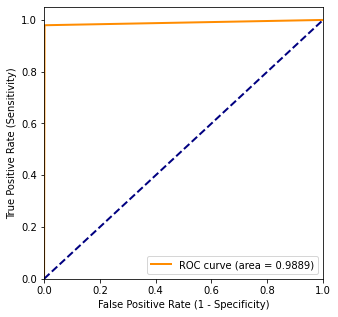

In [47]:
# AUC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_gb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()